In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy.misc import toimage, imresize
import tensorflow as tf
from vgg16 import vgg16
from utils import GradCam

# load cifar-10 training data

In [2]:
with open('./cifar10/data_batch_1', 'rb') as f:
    out = pickle.load(f)

data =  out[b'data']
label = out[b'labels']

# reshape the data to tensor

In [3]:
n = data.shape[0]
d = 32
imgs = np.zeros((n, d, d, 3))
for row in range(n):
    for k in range(3):
        for j in range(d):
            for i in range(d):
                imgs[row, j, i, k] = data[row, k * 1024 + i + j*32]

# reshape images to (224, 224)

In [4]:
scaled_imgs = np.zeros((n, 224, 224, 3), dtype='uint8')
for ind in range(n):
    scaled_imgs[ind] = resize(imgs[ind], (224, 224))

/home/yu/anaconda3/envs/tensorflow/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


# Show some images to make sure we reshape it correctly

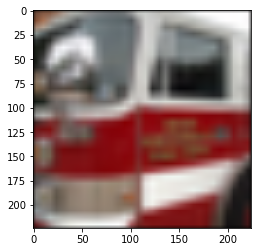

6

In [19]:
plt.imshow(scaled_imgs[166])
plt.show()

label[0] # 6 is a frog

# define a cifar tensorflow model

In [20]:
sess = tf.Session()
imgs = tf.placeholder(tf.float32, [None, 224, 224, 3])
vgg = vgg16(imgs, 'vgg16_weights.npz', sess, 242)
heatmap5 = GradCam(vgg.probs, vgg.pool5, 555)
heatmap4 = GradCam(vgg.probs, vgg.pool5, 407)
heatmap3 = GradCam(vgg.probs, vgg.pool5, 705)
heatmap2 = GradCam(vgg.probs, vgg.pool5, 874)
heatmap1 = GradCam(vgg.probs, vgg.pool5, 439)
ll = sess.run([vgg.probs, heatmap5, heatmap4, heatmap3, heatmap2, heatmap1], feed_dict={vgg.imgs: [scaled_imgs[166]]})
prob = ll[0][0]
heatmap = np.array(ll[1])

0 conv1_1_W (3, 3, 3, 64)
1 conv1_1_b (64,)
2 conv1_2_W (3, 3, 64, 64)
3 conv1_2_b (64,)
4 conv2_1_W (3, 3, 64, 128)
5 conv2_1_b (128,)
6 conv2_2_W (3, 3, 128, 128)
7 conv2_2_b (128,)
8 conv3_1_W (3, 3, 128, 256)
9 conv3_1_b (256,)
10 conv3_2_W (3, 3, 256, 256)
11 conv3_2_b (256,)
12 conv3_3_W (3, 3, 256, 256)
13 conv3_3_b (256,)
14 conv4_1_W (3, 3, 256, 512)
15 conv4_1_b (512,)
16 conv4_2_W (3, 3, 512, 512)
17 conv4_2_b (512,)
18 conv4_3_W (3, 3, 512, 512)
19 conv4_3_b (512,)
20 conv5_1_W (3, 3, 512, 512)
21 conv5_1_b (512,)
22 conv5_2_W (3, 3, 512, 512)
23 conv5_2_b (512,)
24 conv5_3_W (3, 3, 512, 512)
25 conv5_3_b (512,)
26 fc6_W (25088, 4096)
27 fc6_b (4096,)
28 fc7_W (4096, 4096)
29 fc7_b (4096,)
30 fc8_W (4096, 1000)
31 fc8_b (1000,)


In [14]:
heatmap.shape

(7, 7)

In [23]:
## 
from imagenet_classes import class_names
preds = (np.argsort(prob)[::-1])[0:5]
for p in preds:
    print class_names[p], '%2.2f'%prob[p]

fire engine, fire truck 0.32
ambulance 0.15
passenger car, coach, carriage 0.07
trolleybus, trolley coach, trackless trolley 0.06
bearskin, busby, shako 0.04


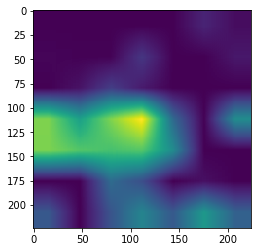

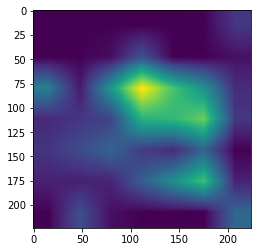

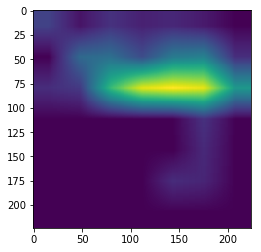

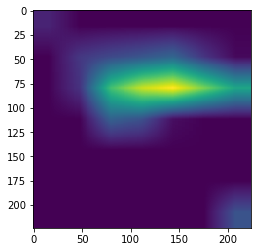

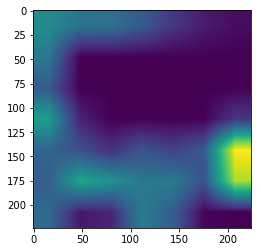

In [24]:
for i in range(1, 6):
    heatmap = np.array(ll[i])
    plt.figure()
    plt.imshow(imresize(toimage(heatmap), (224, 224)))
    plt.show()